# CIS-522 Week 2 Homework


**Instructor:** Konrad Kording

**Content Creators:** Ameet Rahane, Spiros Chavlis

---
## Preface
Since this week's homework requires coding, we recommend saving this notebook in your google Drive (`File -> Save a copy in Drive`), and share the link to the final version in the subscription airtable form. You can also attach the code to the form if you prefer off-colab coding.

In [65]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'jabrantl' #@param {type:"string"}
my_pod = 'superfluous-lyrebird' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion','astute-jellyfish', 'quantum-herring']

# start timing
import time
try:t0;
except NameError: t0 = time.time()



## Part 1. Recap
This week, we looked at how to create deep fully connected networks in pytorch, covering everything from an introduction to Pytorch tensor operations to deep linear networks. Meet with your pod for 10 minutes to discuss what you learned, what was clear, and what you hope to learn more about.

In this homework, we will be exploring that a little more. First, we will read a paper by Andrew M. Saxe, James L. McClelland, and Surya Ganguli on _A mathematical theory of semantic development in deep neural networks_. Then, you will design your own linear network to solve a given problem on a dataset.

**Note:** Before or after doing the Homework, we highly encourage you to finish the optional material of [W2_Tutorial2](https://colab.research.google.com/github/CIS-522/course-content/blob/main/tutorials/W2_PyTorchDLN/student/W2_Tutorial2.ipynb) notebook, and especially Section 7. Although the concepts covered in the optional part are not a requirement to finish the Homework, finishing these materials will help you improve your current intuition on Deep Learning.



## Part 2: Read a paper

Read the paper [A mathematical theory of semantic development in deep neural networks](https://www.pnas.org/content/116/23/11537.short). Take some time and try to contextualize this with respect to the content we covered this week. For more context, watch the talk by Surya Ganguli below. After reading the paper, discuss the main figures with your pod.

Video available at https://youtube.com/watch?v=SJAvFqHw-hA


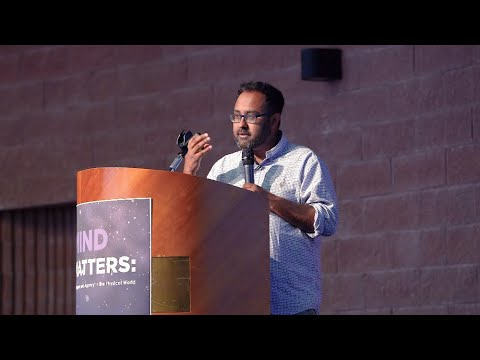

In [66]:
#@markdown ### Dr. Ganguli's talk
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="SJAvFqHw-hA", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [67]:
#@markdown **Student response**: What do you think is the most important aspect of the paper?
thoughts_on_paper = 'The biggest contribution is to show that deep linear networks exhibit nonlinear learning behavior and that this can be understood through SVD of the input-output correlation. They show that the singular values provide insight to the learning of category membership and features. This also reveals how more coherent categories are learned more quickly.' #@param {type:"string"}


## Part 3: Design your deep network!

In this section, you'll design a deep linear network to perform linear regression in a real dataset. We will provide the data for you.

We will use the **QSAR fish toxicity dataset** taken from the UCI Machine Learning Repository for this homework. For more information you can see [here](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity) and also read the relevant [publication](http://www.doi.org/10.1080/1062936X.2015.1018938). This study focuses on the development of a new QSAR (Quantitative structure-activity relationship, for more info see [here](https://en.wikipedia.org/wiki/Quantitative_structure%E2%80%93activity_relationship)) model to predict the acute toxicity of various chemicals, defined as $LC_{50}$ 96 hours, towards the fathead minnow (Pimephales promelas).

The dataset consists of $908$ number of examples, $6$ features, and $1$ target variable.

Namely, the features are six molecular descriptors:

1. CIC0: Complementary Information Content index, neighborhood symmetry of 0-order (encode information regarding heteroatoms)
2. SM1_Dz(Z): the spectral moment of order one from Barysz matrix weighted by atomic number (account for heteroatoms, large values more heterogeneity)
3. GATS1i: Geary autocorrelation of lag 1 weighted by ionization potential (shows the number of carbon-carbon bonds)
4. NdsCH: Number of atoms of type dsCH (encode information
about the electrophilic characteristics of chemicals)
5. NdssC: Number of atoms of type dssC (encode information
about the electrophilic characteristics of chemicals)
6. MLogP: Moriguchi octanol-water partition coefficient (a widely accepted estimate of the lipophilicity of organic compounds, which is considered the driving force of narcosis) 

and the target variable is a quantitative response (toxicity), $LC_{50} [-log_{10}(mol/L)]$.

This small project aims to find the linear relationship between these molecular markers and the toxicity. So, you will implement a deep linear network to perform linear regression.

Towards this goal, you have to perform the following steps:

1. Download and visualize the dataset. As our samples contain six features, we can perform PCA or any other dimensionality reduction method to visualize our dataset, e.g., [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

  ```python
    # Code example for PCA
    X = np.array([[-1, -1],
                  [-2, -1],
                  [-3, -2],
                  [1, 1],
                  [2, 1],
                  [3, 2]])

    pca = decomposition.PCA(n_components=2)  # project in 2D space
    pca.fit(X)
    Xprojected = pca.transform(X)
  ```

2. Split the dataset into training and testing subsets (you can split in 80-20 scheme) using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
3. Write your deep linear network with any approach that is more comfortable for you. Here, we provide an example using the `nn.Module` class of PyTorch.

  ```python
    # Example
    class Network(nn.Module):

      def __init__(self, input_dim, hidden_1, hidden_2, output_dim):
        super(Network, self).__init__()

        self.input_dim = input_dim
        self.hidden_1 = hidden_1
        self.output_dim = output_dim

        # A fully-connected network (FCN) with 2 hidden layers
        self.fc1 = nn.Linear(self.input_dim, self.hidden_1)
        self.fc2 = nn.Linear(self.hidden_1, self.output_dim)

      def forward(self, x):
        h1 = self.fc1(x)
        out = self.fc3(h1)

        return out

  ```

4. Choose the hyperparameters (i.e., number of epochs, learning rate, number of layers and nodes per layer)

  ```python
    # Here, you have to write your training loop

    def training(inputs, targets, num_epochs, learning_rate):

      # Set up the network
      mynetwork = Network(...)

      # optimizer and loss function
      criterion = ...
      optimizer = ...

      for epoch in range(num_epochs):
        # Your CODE goes here

      return (loss_training, loss_test, ...)
    
  ```

5. Train the model and give the graph with
  - training and test loss vs. number of epochs
  ```python
    plt.figure()
    plt.plot(..., label='training', 'b')
    plt.plot(..., label='test', 'r')
    plt.legend()
    plt.show()
  ```
6. Give a plot with the model's performance (actual vs. predicted targets)
  ```python
    plt.figure()
    plt.plot(..., alpha=0.5)
    plt.plot(..., label='regression', 'r')  # plot the y=y_hat line
    plt.legend()
    plt.show()  

  ```
7. Train the model again by removing each time one feature. Report what do you observe in terms of performance. You can use NumPy's function [`np.delete()`](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) to remove specific rows/columns from a `ndarray` object.
  ```python
    # Here, we have to remove one by one the features from the X dataset
    # Hint: The network input layer has to be changed ...
    # retrain and keep the predictions.
    # Then, plot all regressions in one plot using subplots
    plt.figure()
    for i, preds in enumerate(predictions):
      plt.subplot(2, 3, i + 1)
      plt.plot(...)  # plot original y vs. y_hat
      plt.plot(...)  # y=y_hat
      plt.legend()
  ```


*Hints:*
- Be sure to use the correct dimensions
- Put legends and title in all plots

**Note:** Typically, to make unbiased and more accurate predictions, we perform multiple training pieces with different initializations (recall that we initialize parameters sampling from distribution) and different train-test splits. Here we want to run one time for the shake of timing, but feel free to run more times the training loops and plot the average losses!

In [68]:
#@markdown #Run this cell to download the dataset
#@markdown ##Inputs are stored in `X`, and targets in `y`.

import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv'

headers = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLogP', 'LC50']

df1 = pd.read_csv(url, names = headers, header=None, delimiter=";")

X = np.array(df1)[:,:-1]
y = np.array(df1)[:,-1].reshape(-1,1)

print(f'Data: \n{df1}')

print(f'\ninput shape of X: {X.shape}, ' 
      f'targets shape of y: {y.shape}')

Data: 
      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLogP   LC50
0    3.260      0.829   1.676      0      1  1.453  3.770
1    2.189      0.580   0.863      0      0  1.348  3.115
2    2.125      0.638   0.831      0      0  1.348  3.531
3    3.027      0.331   1.472      1      0  1.807  3.510
4    2.094      0.827   0.860      0      0  1.886  5.390
..     ...        ...     ...    ...    ...    ...    ...
903  2.801      0.728   2.226      0      2  0.736  3.109
904  3.652      0.872   0.867      2      3  3.983  4.040
905  3.763      0.916   0.878      0      6  2.918  4.818
906  2.831      1.393   1.077      0      1  0.906  5.317
907  4.057      1.032   1.183      1      3  4.754  8.201

[908 rows x 7 columns]

input shape of X: (908, 6), targets shape of y: (908, 1)


Insert your code in the cell below or use any IDE (e.g, [PyCharm](https://www.jetbrains.com/pycharm/), [VS-Code](https://code.visualstudio.com/), [Spyder](https://www.spyder-ide.org/), etc.) or editor you prefer.

(1) Import libraries

In [69]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import random, time
from sklearn import decomposition, linear_model
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.notebook import tqdm, trange
import numpy as np

(2) Visualize principal components of data using two and three components:

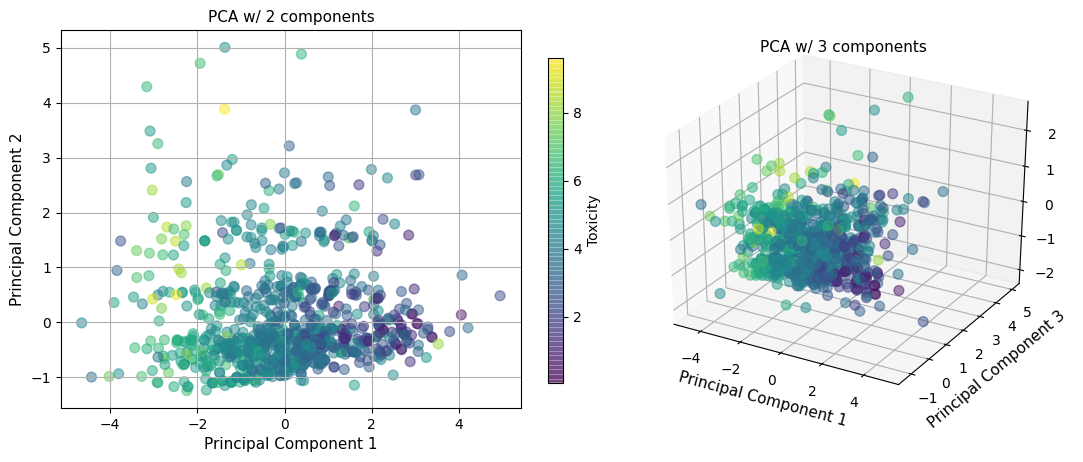

In [70]:
def pca_plots(X,y):
  # Visualize principal components of data: use two components
  pca_2 = decomposition.PCA(n_components=2)
  pca_2.fit(X)
  X_pca_2 = pca_2.transform(X)

  # Visualize principal components of data: use three components
  pca_3 = decomposition.PCA(n_components=3)
  pca_3.fit(X)
  X_pca_3 = pca_3.transform(X)

  # Colors
  cmap = plt.get_cmap("viridis")
  norm = plt.Normalize(y.min(), y.max())

  # Plot first two PCs
  fig = plt.figure(figsize=(15,5),dpi=100,facecolor='w',edgecolor='k')
  ax1 = fig.add_subplot(1,2,1)
  ax1.set_xlabel('Principal Component 1', fontsize = 11)
  ax1.set_ylabel('Principal Component 2', fontsize = 11)
  ax1.set_title('PCA w/ 2 components', fontsize = 11)
  out = ax1.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, s = 50,alpha=0.5)
  ax1.grid()

  # Plot first three PCs
  ax2 = fig.add_subplot(1,2,2,projection='3d')
  ax2.set_xlabel('Principal Component 1', fontsize = 11)
  ax2.set_ylabel('Principal Component 2', fontsize = 11)
  ax2.set_ylabel('Principal Component 3', fontsize = 11)
  ax2.set_title('PCA w/ 3 components', fontsize = 11)
  ax2.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y, s = 50,alpha=0.5)

  # Add colorbar
  fig.subplots_adjust(right=0.8)
  cbar_ax = fig.add_axes([0.45, 0.175, 0.01, 0.65])
  cbar = fig.colorbar(out, cax=cbar_ax)
  cbar.ax.set_ylabel('Toxicity')

  plt.show()

pca_plots(X,y)

(3) Split data into train and test sets

In [71]:
# Split into training and testing and create Variable
def prepare_data(X,y,test_size=0.20, random_state=4):
  # Split train/test data
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
  
  # Use GPU if available
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Converting inputs and labels to Variable
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).float().cuda())
    targets = Variable(torch.from_numpy(y_train).float().cuda())
    inputs_test = Variable(torch.from_numpy(x_test).float().cuda())
    targets_test = Variable(torch.from_numpy(y_test).float().cuda())
  else:
    inputs = Variable(torch.from_numpy(x_train).float())
    targets = Variable(torch.from_numpy(y_train).float())
    inputs_test = Variable(torch.from_numpy(x_test).float())
    targets_test = Variable(torch.from_numpy(y_test).float())

  return inputs, targets, inputs_test, targets_test

(4) Create simple 2-layer network

In [72]:
# Define simple Network class inhereting from Module class
class Network(nn.Module):
  # Initialize the layers
  def __init__(self, input_dim, hidden_units, output_dim):
    super().__init__()
    
    self.layers = nn.ModuleList()
    self.hidden_units = hidden_units

    # A fully-connected network (FCN) with len(hidden_units) hidden layers
    for i in range(len(hidden_units)):
      self.layers += [nn.Linear(input_dim, self.hidden_units[i])]
      input_dim =  self.hidden_units[i]

    self.out = nn.Linear(input_dim, output_dim)

  # forward pass
  def forward(self, x):
    for layer in self.layers:
      x = layer(x)

    return self.out(x)


model = Network(input_dim=219, hidden_units=[50, 25, 10], output_dim=1)
print(model)

def plot_performance(losses_train,losses_test,target_actual,target_predict):
  
  # Plot loss
  fig = plt.figure(figsize=(15,3),dpi=100,facecolor='w',edgecolor='k')
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(losses_train, label='Training Error')
  plt.plot(losses_test, label='Test Error')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.xlim(0, epochs)
  plt.legend()

  # # Regress predictions
  # regr = linear_model.LinearRegression()
  # regr.fit(target_actual.cpu().detach().numpy(),target_predict.cpu().detach().numpy().reshape(1, -1))
  # results_fit = regr.predict(np.linspace(target_actual.cpu().detach().numpy().min(),target_actual.cpu().detach().numpy().max(),100))
  
  # Plot predicted vs actual targets
  ax2 = fig.add_subplot(1,2,2)
  # ax2.plot(np.linspace(target_actual.cpu().detach().numpy().min(),target_actual.cpu().detach().numpy().max(),100), results_fit, 'r--', alpha=0.5,linewidth=1.8, label='True vs Predict')
  ax2.plot(target_actual.cpu().detach().numpy(), target_predict.cpu().detach().numpy(), 'r.', alpha=0.5, linewidth=1.8, label='True vs Predict')
  ax2.plot(target_actual.cpu().detach().numpy(), target_actual.cpu().detach().numpy(), 'k--', linewidth=1.8, label='True vs True')
  ax2.set_xlabel('True value')
  ax2.set_ylabel('Predicted values')
  plt.legend()
  plt.show()
  

Network(
  (layers): ModuleList(
    (0): Linear(in_features=219, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=25, bias=True)
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
  (out): Linear(in_features=10, out_features=1, bias=True)
)


(5) Train the model and compute loss on train and test sets


Loss in the test set: 1.3809962272644043


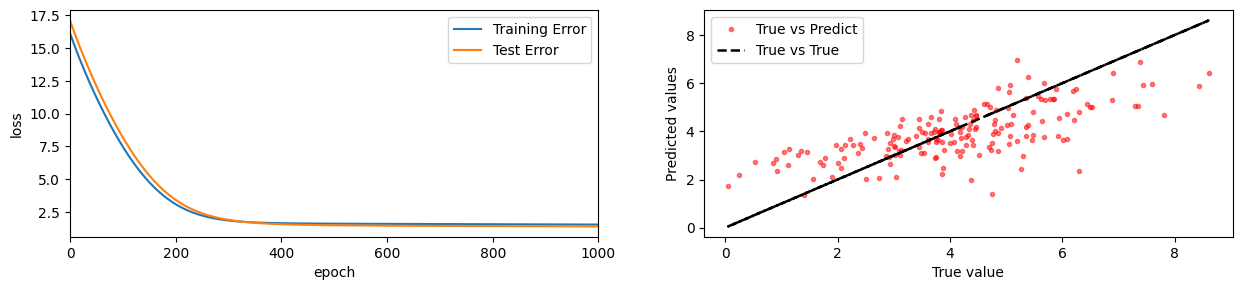

In [73]:
# Prepare data: split train/test and make Variable
inputs, targets, inputs_test, targets_test = prepare_data(X,y)

# Define network
hidden = [10, 20]
model = Network(inputs.shape[1], hidden, targets.shape[1])

# Define parameters
learningRate=1e-4
epochs=1000

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  
# Make it run on GPU!
model.train(True)
model.to(device)

# Loss function
criterion = nn.MSELoss()
# criterion = nn.L1Loss()

# Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

loss_val = []
loss_test = []

epoch_range = trange(epochs, desc='loss: ', leave=True)
for epoch in epoch_range:
  if loss_val:
    epoch_range.set_description("loss: {:.6f}".format(loss_val[-1]))
    epoch_range.refresh() # to show immediately the update
  time.sleep(0.01)

  # Clear gradient buffers because we don't want any gradient from
  # previous epoch to carry forward, dont want to cummulate gradients
  optimizer.zero_grad()        
  # get output from the model, given the inputs
  outputs = model(inputs)
  # get loss for the predicted output
  loss = criterion(outputs, targets)
  # get gradients w.r.t to parameters
  loss.backward()

  # update parameters
  optimizer.step()
  loss_val.append(loss.item())
  # calculate and store the loss on the test set
  loss_temp = criterion(model(inputs_test), targets_test)
  loss_test.append(loss_temp.item())

# Testing the model
y_predict = model(inputs_test)
loss_test_final = criterion(y_predict, targets_test)
print(f'Loss in the test set: {loss_test_final}')

# Plot train and test loss
plot_performance(loss_val, loss_test,targets_test,y_predict)



Loss in the test set: 1.3162428140640259


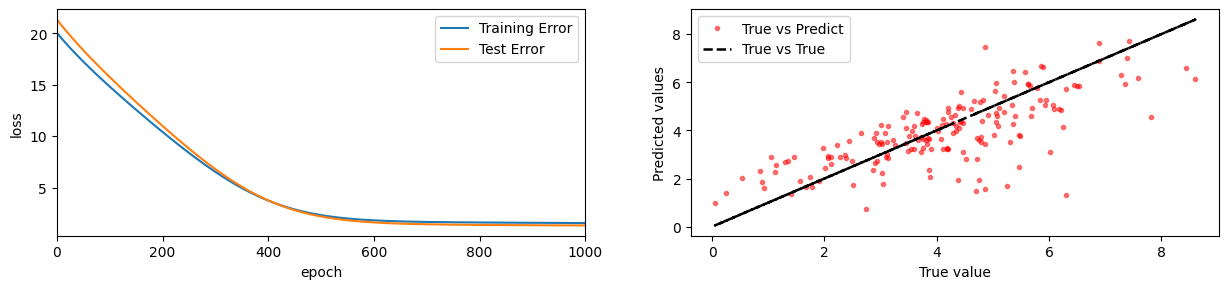


Loss in the test set: 1.3449013233184814


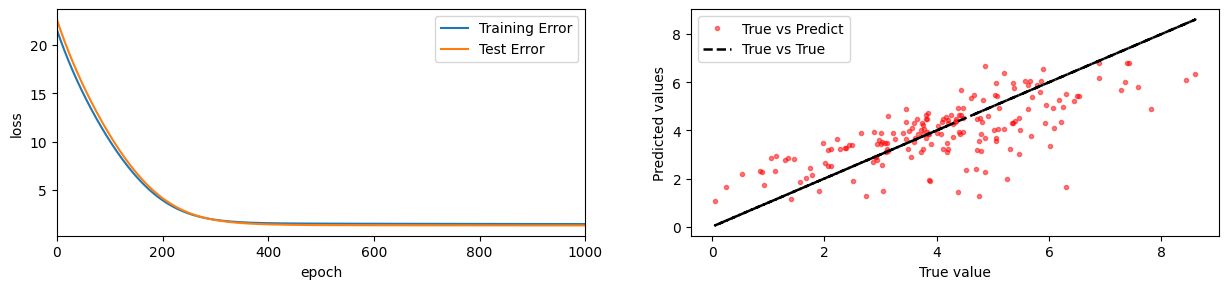


Loss in the test set: 1.3803359270095825


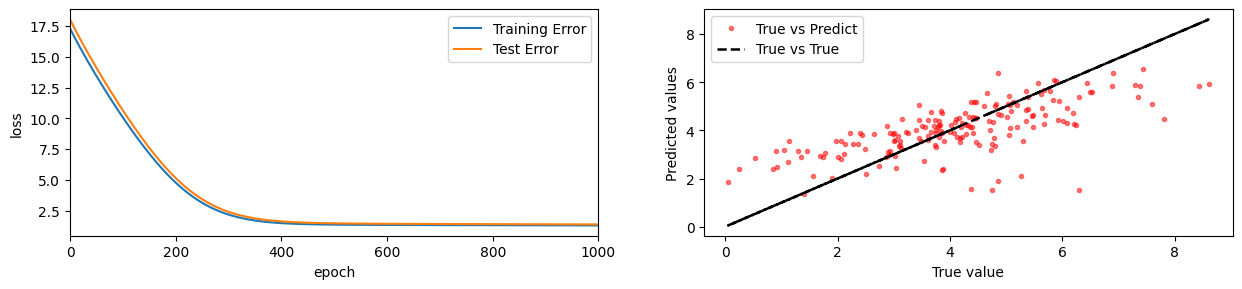


Loss in the test set: 1.4519178867340088


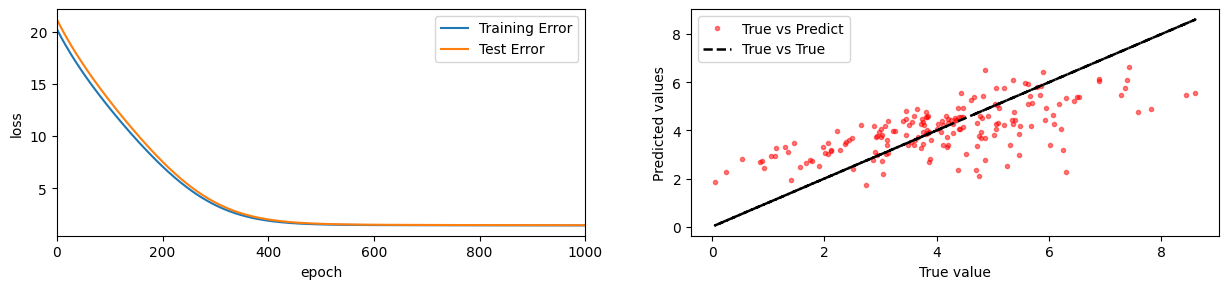


Loss in the test set: 1.5812175273895264


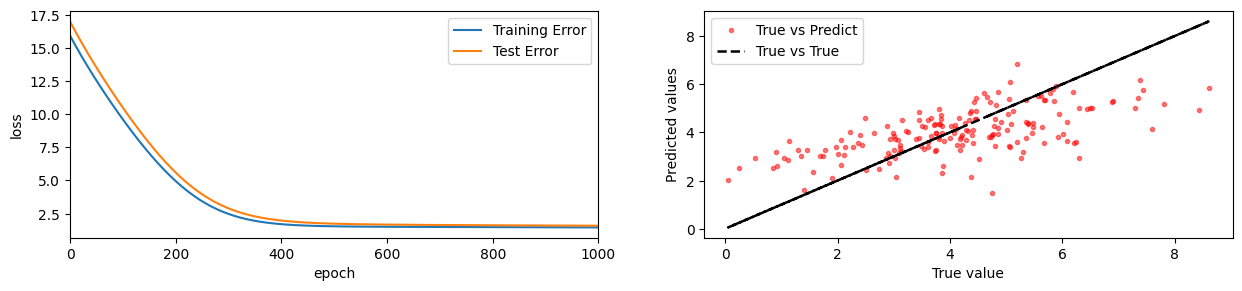


Loss in the test set: 2.7097277641296387


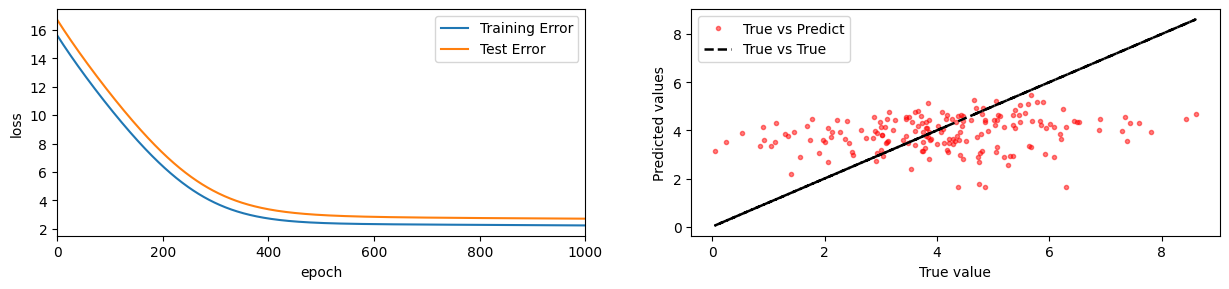

In [74]:
# Loop through each feature, delete, and rerun training
all_models = []
all_losses = []
for i in range(X.shape[1]):
  
  # Delete ith column
  xnew = np.delete(X,i, axis=1)
  
  # Prepare data: split train/test and make Variable
  inputs, targets, inputs_test, targets_test = prepare_data(xnew,y)

  # Define network
  hidden = [10, 20]
  model = Network(inputs.shape[1], hidden, targets.shape[1])

  # Define parameters
  learningRate=1e-4
  epochs=1000

  # Check if GPU is available
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
  # Make it run on GPU!
  model.train(True)
  model.to(device)

  # Loss function
  criterion = nn.MSELoss()
  # criterion = nn.L1Loss()

  # Gradient Descent
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  loss_val = []
  loss_test = []

  epoch_range = trange(epochs, desc='loss: ', leave=True)
  for epoch in epoch_range:
    if loss_val:
      epoch_range.set_description("loss: {:.6f}".format(loss_val[-1]))
      epoch_range.refresh() # to show immediately the update
    time.sleep(0.01)

    # Clear gradient buffers because we don't want any gradient from
    # previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()        
    # get output from the model, given the inputs
    outputs = model(inputs)
    # get loss for the predicted output
    loss = criterion(outputs, targets)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    loss_val.append(loss.item())
    # calculate and store the loss on the test set
    loss_temp = criterion(model(inputs_test), targets_test)
    loss_test.append(loss_temp.item())

  # Testing the model
  y_predict = model(inputs_test)
  loss_test_final = criterion(y_predict, targets_test)
  print(f'Loss in the test set: {loss_test_final}')

  # Plot train and test loss
  plot_performance(loss_val, loss_test,targets_test,y_predict)

  # Save results
  all_models.append(model)
  all_losses.append([loss_val,loss_test,loss_test_final])

In [75]:
#@markdown **Student response**: Which is the most/less important feature of this dataset?
dataset_features = 'The most important feature in the dataset appears to be the last column in the data: Moriguchi octanol-water partition coefficient (MLogP). This results in the highest loss in the test set and a longer time to convergence. The least important feature appears to be the first feature (Complementary Information Content index, neighborhood symmetry of 0-order), which after removal, reduces the MSE loss to below the loss after training/testing with the full feature space. ' #@param {type:"string"}


# Submission
Double check that the answers have been correctly formatted in the Airtable below, and edit them as desired. **In addition to submitting the form, contribute and reflect on these readings in the student Slack space.**

Feel free to use the embeded form below or use this link:
<a target="_blank" rel="noopener noreferrer" href="https://airtable.com/shrV231jtyUrwkvuZ">https://airtable.com/shrV231jtyUrwkvuZ</a>

In [76]:
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**
import numpy as np
import time
from IPython.display import IFrame
def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefills = "&".join(["prefill_%s=%s"%(key, fields[key]) for key in fields])
  src = src + prefills
  src = "+".join(src.split(" "))
  return src

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: general_thoughts;
except NameError: general_thoughts = ""
try: dataset_features;
except NameError: dataset_features = ""

times = 0

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "thoughts_on_paper":general_thoughts,
          "reflection_1":dataset_features,
          "cumulative_times": times}

src = "https://airtable.com/embed/shrV231jtyUrwkvuZ?"

#now instead of the original source url, we do: src = prefill_form(src, fields)
display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))

In [77]:
#@markdown Unused code. Needs to be debugged

# class Network(nn.Module):

#   def __init__(self, input_dim, hidden_1, hidden_2, output_dim):
#     # Inheret nn.Module
#     super(Network, self).__init__()

#     # Get layer dimensions
#     self.input_dim = input_dim
#     self.hidden_1 = hidden_1
#     self.hidden_2 = hidden_2
#     self.output_dim = output_dim

#     # Define fully-connected (FC) network with 2 hidden layers
#     self.fc1 = nn.Linear(self.input_dim, self.hidden_1)
#     self.fc2 = nn.Linear(self.hidden_1, self.hidden_2)
#     self.fc3 = nn.Linear(self.hidden_2, self.output_dim)

#   def forward(self, x):
#     h1 = self.fc1(x)
#     h2 = self.fc2(h1)
#     out = self.fc3(h2)

#     return out


# def train_network(input_train,target_train,input_test,target_test, model, learning_rate=0.01, num_epochs=500):
#   # Define loss as L1 or L2 (MSE)
#   #criterion = nn.L1Loss() 
#   criterion = nn.MSELoss()

#   # Use stochastic gradient descent
#   optimizer = torch.optim.SGD(model.parameters(),
#                               lr=learning_rate)
  
#   # Check if GPU is available
#   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  
#   # Make it run on GPU!
#   model.train(True)
#   model.to(device)

#   # Train for num_epochs
#   loss_train = []
#   loss_test  = []
#   epoch_range = trange(num_epochs, desc='loss: ', leave=True)
#   for epoch in epoch_range:
#     if loss_train:
#       print(true)
#       epoch_range.set_description("loss: {:.6f}".format(loss_train[-1]))
#       epoch_range.refresh() # to show immediately the update
#     time.sleep(0.01)

#     # Make prediction
#     prediction = model(input_train)
#     # Compute loss and store
#     loss = criterion(prediction , target_train)
#     loss_train.append(loss.item())

#     # Back prop error and gradient descent
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
    
#     # Compute loss on test set
#     loss_test.append(criterion(model(input_test),target_test))

#     # Display loss
#     print(f'The loss after training is: {loss}')
    
#     return model, loss_train, loss_test

# def prepare_data(X,y,test_size=0.20, random_state=4):
#   # Split into training and testing
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

#   # Converting inputs and labels to Variable
#   if torch.cuda.is_available():
#     inputs = Variable(torch.from_numpy(X_train).float().cuda())
#     targets = Variable(torch.from_numpy(y_train).float().cuda())
#     inputs_test = Variable(torch.from_numpy(X_test).float().cuda())
#     targets_test = Variable(torch.from_numpy(y_test).float().cuda())
#   else:
#     inputs = Variable(torch.from_numpy(X_train).float())
#     targets = Variable(torch.from_numpy(y_train).float())
#     inputs_test = Variable(torch.from_numpy(X_test).float())
#     targets_test = Variable(torch.from_numpy(y_test).float())

#   # input size dimension - features
#   return inputs, targets, inputs_test, targets_test